In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.stats as stats
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification

In [2]:
credit_data = pd.read_csv('creditcard_2023.csv',index_col="id")
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Null Values Check

In [3]:
credit_data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Class Balance Check

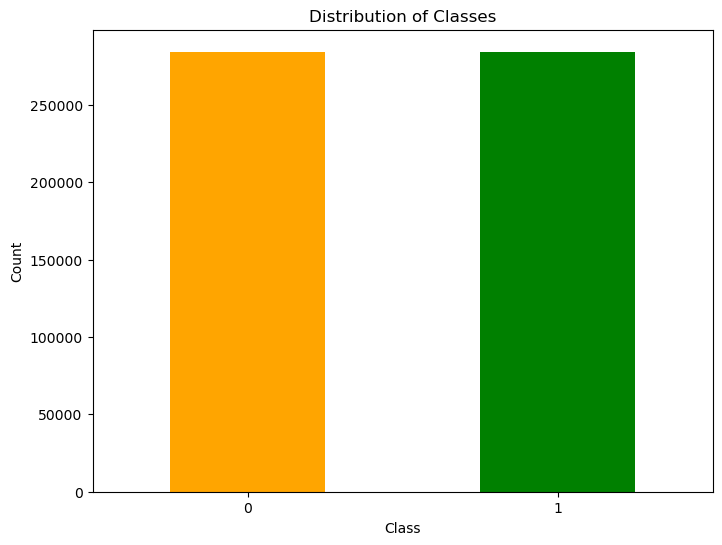

In [4]:
class_counts = credit_data['Class'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['orange', 'green'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Metrics Utility Function

In [5]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,accuracy_score
def get_metrics(y_test,y_pred):
    print("Test Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ",precision_score(y_test, y_pred))
    print("F1 Score: ",f1_score(y_test, y_pred))
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

### Train-Test Split

In [9]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Dimensionality Reduction - Feature Selection

In [12]:
# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 2: Train a Random Forest model to obtain feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Step 3: Print feature importances
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
print(feature_importances)
# Step 4: Plot a scree plot
plt.figure(figsize=(8, 6))
plt.plot(sorted(feature_importances, reverse=True), marker='o', linestyle='-', color='b')
plt.title('Scree Plot of Feature Importances')
plt.xlabel('Features (sorted by importance)')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()

In [ ]:
threshold = np.sort(feature_importances)[-10]
sfm = SelectFromModel(rf_model, threshold=threshold)
X_train_selected = sfm.fit_transform(X_train_scaled, y_train)
X_test_selected = sfm.transform(X_test_scaled)

In [ ]:
selected_feature_names = X.columns[sfm.get_support()]

print("Selected Feature Names:", selected_feature_names)

### Checking the performance of Feature Selection Dataset on Baseline Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_model1 = LogisticRegression(max_iter=1000)
log_reg_model1.fit(X_train_selected,y_train)

In [ ]:
log_reg_pred = log_reg_model1.predict(X_test_selected)
get_metrics(y_test,log_reg_pred)

### Dimensionality Reduction - PCA

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
k = 17
X_pca_selected = X_pca[:, :k]

# Optionally, you can analyze the explained variance to understand how much information is retained
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Explained Variance Ratio:", explained_variance_ratio)
print(f"Cumulative Explained Variance (k={k}): {cumulative_variance_ratio[k-1]:.4f}")

# Create a DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(k)]
df_pca = pd.DataFrame(data=X_pca_selected, columns=columns)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, y, test_size=0.2, random_state=42)

### Checking the performance of PCA Dataset on Baseline Model

In [ ]:
log_reg_model2 = LogisticRegression(max_iter=1000)
log_reg_model2.fit(X_train_pca,y_train)

In [ ]:
log_reg_pred2 = log_reg_model2.predict(X_test_pca)
get_metrics(y_test_pca,log_reg_pred2)

### Independence testing of "Amount" Column

In [ ]:
fraud_amounts = credit_data.loc[credit_data['Class'] == 1, 'Amount']
non_fraud_amounts = credit_data.loc[credit_data['Class'] == 0, 'Amount']

In [ ]:
statistic, p_value = stats.mannwhitneyu(fraud_amounts, non_fraud_amounts)

alpha = 0.05

print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in amounts between fraud and non-fraud transactions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in amounts between fraud and non-fraud transactions.")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Fraud Transactions
sns.histplot(fraud_amounts, bins=30, kde=False, color='red', ax=ax1)
ax1.set_xlabel('Amount')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Amounts for Fraud Transactions')

# Plot for Non-Fraud Transactions
sns.histplot(non_fraud_amounts, bins=30, kde=False, color='blue', ax=ax2)
ax2.set_xlabel('Amount')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Amounts for Non-Fraud Transactions')

plt.tight_layout()

plt.show()

## Classification Models

### Logistic Regression

### K-Nearest Neighbours

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=10)

In [ ]:
KNN_model.fit(X_train_selected,y_train)

In [ ]:
KNN_pred = KNN_model.predict(X_test_selected)
get_metrics(y_test,KNN_pred)

### Random-Forest Classifier

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Replace with your chosen classifier
RF_classifier.fit(X_train_selected, y_train)
RF_pred = RF_classifier.predict(X_test_selected)
get_metrics(y_test,RF_pred)

In [ ]:
# Save X_train_selected to CSV
X_train_selected_df.to_csv('X_train_selected.csv', index=False)

# Save X_test_selected to CSV
X_test_selected_df.to_csv('X_test_selected.csv', index=False)

# Save y_train to CSV
y_train.to_csv('y_train.csv', index=False, header=['Class'])  # Assuming 'Class' is the column name

# Save y_test to CSV
y_test.to_csv('y_test.csv', index=False, header=['Class']) 

In [ ]:
X_train_selected_df = pd.DataFrame(X_train_selected, columns=['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'])  # Replace with actual feature names
X_test_selected_df = pd.DataFrame(X_test_selected, columns=['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'])  # Replace with actual feature names
y_train_df = pd.DataFrame({'Class': y_train})
y_test_df = pd.DataFrame({'Class': y_test})

## Anomaly Detection

<h3>Extracting the non-fraud data 

In [ ]:
x_train = pd.concat([X_train_selected,y_train], axis=1)
x_train

In [ ]:
non_fraud_train = x_train[x_train['Class']==0]
non_fraud_train

In [ ]:
x_non_fraud_train = non_fraud_train.iloc[:, :-1]

In [ ]:
x_non_fraud_train

<h3>Isolation Forest Model

In [ ]:
# Train Isolation Forest on non-fraud data
isolation_forest = IsolationForest(contamination='auto') 
isolation_forest.fit(x_non_fraud_train)

In [ ]:
y_test_predict = isolation_forest.predict(X_test_selected)

In [ ]:
set(y_test_predict)

In [ ]:
y_test_predict = np.where(y_test_predict == -1, 1, 0)

In [ ]:
y_test_predict

In [ ]:
y_test_predict = pd.DataFrame(y_test_predict, columns=['Class'])

In [ ]:
get_metrics(y_test,y_test_predict)

## Hybrid Model

In [ ]:
classifier = RandomForestClassifier()
classifier_pipeline = Pipeline([ # Optional: Standardize features if needed
    ('classifier', classifier)
])

In [ ]:
classifier_pipeline.fit(X_train_selected, y_train)
X_train_class_output = classifier_pipeline.predict_proba(X_train_selected)[:, 1]  # Use probability of positive class
X_test_class_output = classifier_pipeline.predict_proba(X_test_selected)[:, 1]

In [ ]:
unique_values, counts = np.unique(X_train_class_output, return_counts=True)

value_counts_dict = dict(zip(unique_values, counts))

print("Value Counts:")
print(value_counts_dict)

In [ ]:
anomaly_detector = OneClassSVM(nu=0.05)
anomaly_detector.fit(X_train_class_output.reshape(-1, 1))

In [ ]:
X_test_anomaly_output = anomaly_detector.predict(X_test_class_output.reshape(-1, 1))

In [ ]:
np.unique(X_test_anomaly_output)

In [ ]:
final_predictions = (X_test_anomaly_output == -1).astype(int)

In [ ]:
get_metrics(y_test,final_predictions)